**UNIT 1 - Data Mining Introduction: Data Preprocessing and Visualisation**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



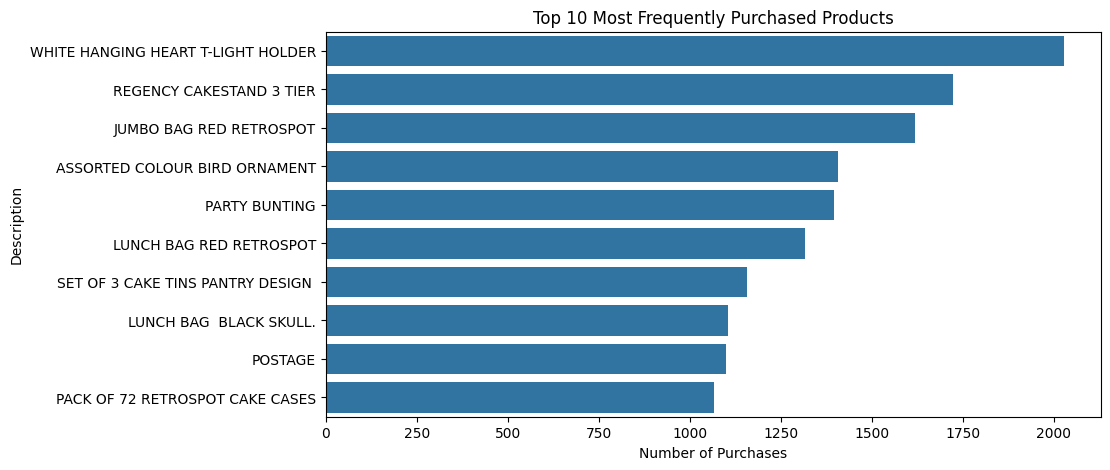

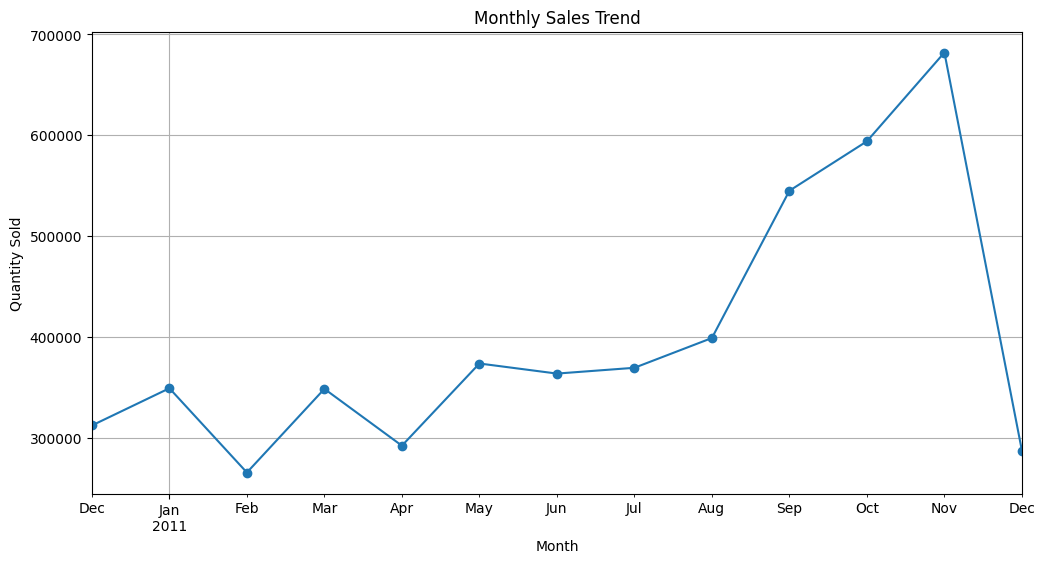

In [10]:
df=pd.read_csv(r"C:\Users\svkum\Downloads\archive (1)\data.csv",encoding="latin1")
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove rows with missing values
df.dropna(inplace=True)

# Remove negative quantities (likely returns)
df = df[df['Quantity'] > 0]

# Add a TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Basic visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 most sold products
top_products = df['Description'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Most Frequently Purchased Products")
plt.xlabel("Number of Purchases")
plt.show()
 #Sales trend by month
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Quantity'].sum()

monthly_sales.plot(kind='line', figsize=(12,6), marker='o', title='Monthly Sales Trend')
plt.ylabel('Quantity Sold')
plt.grid()
plt.show()

**UNIT 2 - Associations and Correlations: Finding Association Rules and Correlations**


In [12]:
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth
from mlxtend.preprocessing import TransactionEncoder

# Grouping transactions
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori Algorithm
frequent_items = fpgrowth(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1)

# Display strong rules
rules.sort_values(by='lift', ascending=False).head()


C:\Users\svkum\AppData\Local\Temp\ipykernel_21644\3259262574.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
c:\Users\svkum\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
888,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN ),0.012085,0.014566,0.010898,0.901786,61.909259,1.0,0.010722,10.033507,0.995882,0.691781,0.900334,0.824967
889,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE PINK),0.014566,0.012085,0.010898,0.748148,61.909259,1.0,0.010722,3.922605,0.998390,0.691781,0.745067,0.824967
590,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",(POPPY'S PLAYHOUSE LIVINGROOM ),0.013703,0.013595,0.010035,0.732283,53.863517,1.0,0.009848,3.684512,0.995070,0.581250,0.728594,0.735189
595,(POPPY'S PLAYHOUSE LIVINGROOM ),"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",0.013595,0.013703,0.010035,0.738095,53.863517,1.0,0.009848,3.765861,0.994961,0.581250,0.734456,0.735189
885,(REGENCY SUGAR BOWL GREEN),(REGENCY MILK JUG PINK ),0.014458,0.014674,0.011114,0.768657,52.381694,1.0,0.010901,4.259150,0.995300,0.616766,0.765211,0.763005


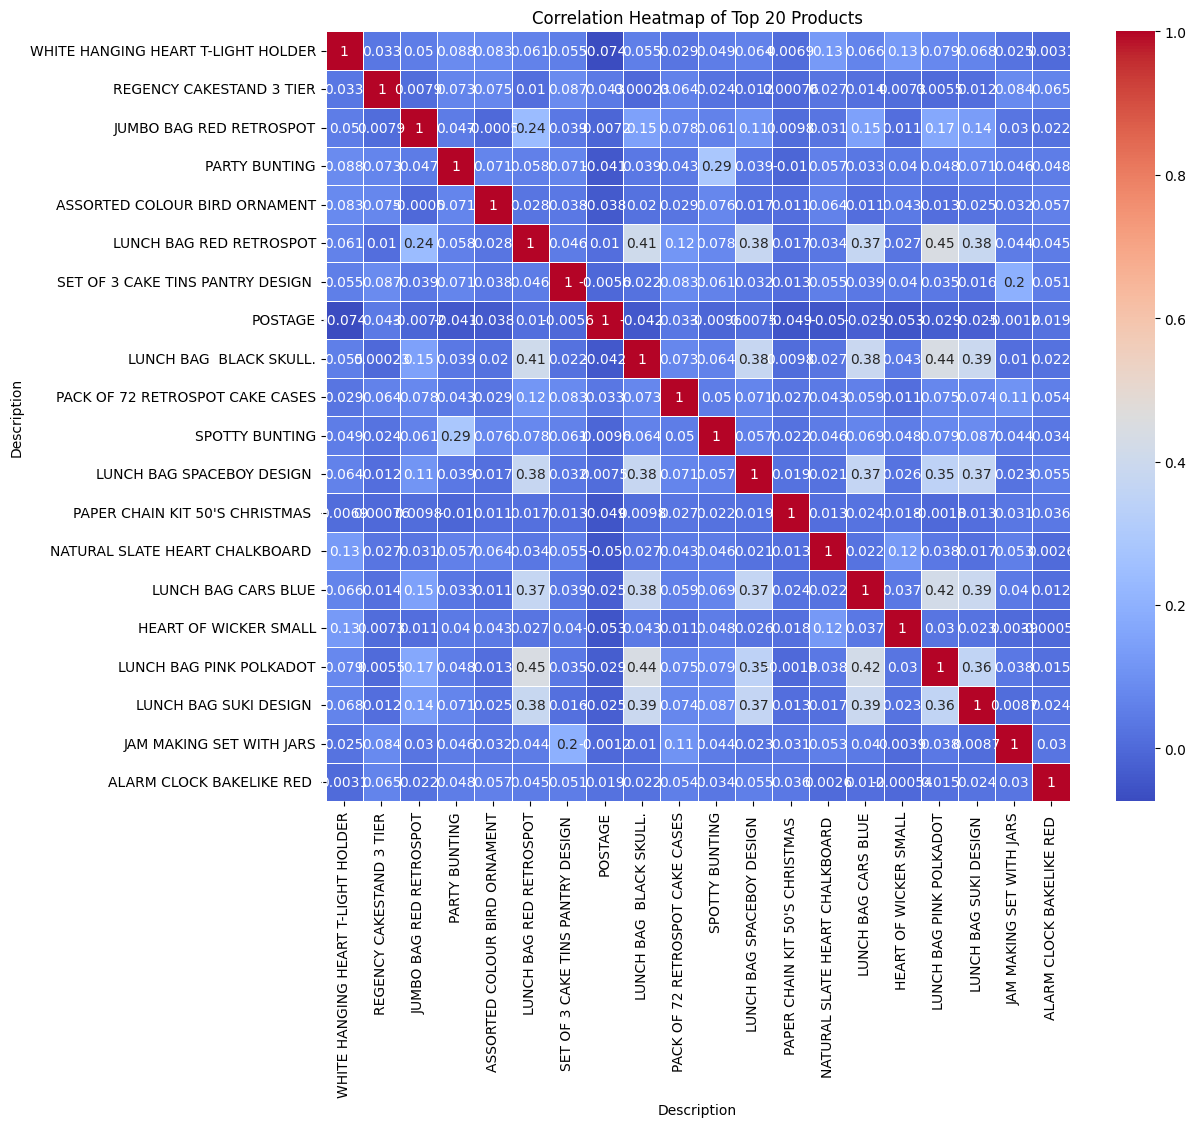

In [13]:
# Generate correlation heatmap for top 20 items
top_items = basket.sum().sort_values(ascending=False).head(20).index
top_basket = basket[top_items]

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(top_basket.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Top 20 Products")
plt.show()



**UNIT 3 - Classification and Prediction : Prediction of Return Rate**


In [23]:
# Let's classify whether a product was bought in high or low quantity (just for illustration)

# Create a binary column for classification
df['HighPurchase'] = df['Quantity'].apply(lambda x: 1 if x > 10 else 0)

# Encode categorical
df_model = df[['StockCode', 'UnitPrice', 'HighPurchase']]
df_model.loc[:,'StockCode'] = df_model['StockCode'].astype('category').cat.codes

# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df_model.drop('HighPurchase', axis=1)
y = df_model['HighPurchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Function to calculate return rate for a given StockCode or Description


# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

def get_return_rate(input_value):
    # Normalize input
    input_value = input_value.strip().lower()
    
    # Match by description or stockcode
    temp_df = df[df['Description'].str.lower() == input_value]
    if temp_df.empty:
        temp_df = df[df['StockCode'].astype(str) == input_value]
    
    if temp_df.empty:
        print("Product not found.")
        return
    
    total_orders = temp_df.shape[0]
    return_orders = temp_df[temp_df['Quantity'] < 0].shape[0]
    
    return_rate = (return_orders / total_orders) * 100
    print(f"Return rate for '{input_value}': {return_rate:.2f}% ({return_orders} out of {total_orders})")

#Example
user_input = input("Enter a StockCode or Product Description to check return rate: ")
get_return_rate(user_input)



Accuracy: 0.8088835835898724
Return rate for 'white metal lantern': 0.00% (0 out of 250)


**UNIT 4 - Cluster Analysis: Customer Segmentation**

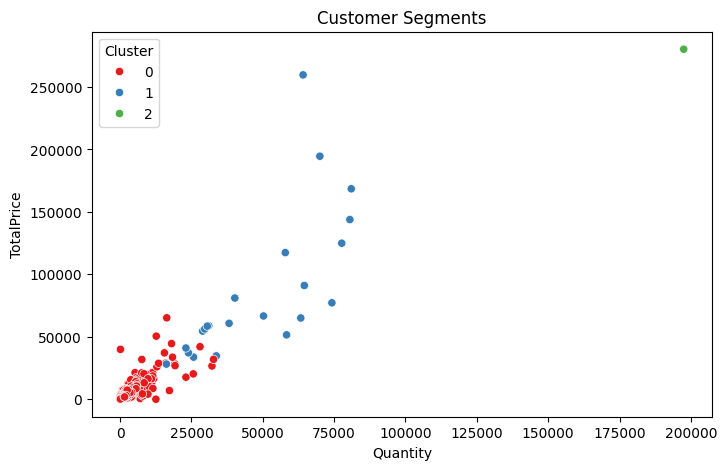

In [8]:
from sklearn.cluster import KMeans
import numpy as np

# Aggregate by CustomerID
customer_df = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df[['Quantity', 'TotalPrice', 'InvoiceNo']])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
customer_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=customer_df, x='Quantity', y='TotalPrice', hue='Cluster', palette='Set1')
plt.title("Customer Segments")
plt.show()


**UNIT 5 - Outliers and Statistical Approaches in Data Mining: Outlier Detection and Product Recommendation System**

In [9]:
# Outlier detection using IQR
Q1 = df['TotalPrice'].quantile(0.25)
Q3 = df['TotalPrice'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['TotalPrice'] < Q1 - 1.5 * IQR) | (df['TotalPrice'] > Q3 + 1.5 * IQR)]

print(f"Detected {len(outliers)} outlier transactions")

# Simple Item-Item Collaborative Filtering
product_customer_matrix = df.pivot_table(index='Description', columns='CustomerID', values='Quantity', aggfunc='sum').fillna(0)

from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(product_customer_matrix)

# Recommend products similar to a given product
product_names = product_customer_matrix.index.tolist()

def recommend(product_name, top_n=5):
    if product_name not in product_names:
        return "Product not found."
    idx = product_names.index(product_name)
    similarity_scores = list(enumerate(similarity_matrix[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    return [product_names[i[0]] for i in similarity_scores]

# Example
recommend("WHITE HANGING HEART T-LIGHT HOLDER")


Detected 31241 outlier transactions


['GIN + TONIC DIET METAL SIGN',
 'RED HANGING HEART T-LIGHT HOLDER',
 'WASHROOM METAL SIGN',
 'LAUNDRY 15C METAL SIGN',
 'GREEN VINTAGE SPOT BEAKER']